# Lung Cancer Detection Model

## Importing Essential Modules

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

## Exploratory Data Analysis

In [77]:
# Loading the datset
dataset_file_path = '../dataset/lung_cancer_dataset.csv'
data = pd.read_csv(dataset_file_path)
df = pd.DataFrame(data)

# Displaying the first 5 rows of data to ensure the dataset is loaded correctly
df.head(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [78]:
# Printing the last 5 records of the dataset
df.tail(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [79]:
# Checking the number of rows and columns (shape) in the dataset
df.shape

(1000, 26)

In [80]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [81]:
# Display basic statistics
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [82]:
# Checking the columns in the dataset
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [83]:
# Checking the data types of each column
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [84]:
# Checking the total number of missing values in the dataset
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [85]:
# Drop unnecessary features from the dataset
df.drop('Patient Id', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)

In [86]:
# Checking if there are any duplicate values in the dataset
print(f"Total number of duplicates in the dataset: {df.duplicated().sum()}")

Total number of duplicates in the dataset: 848


## Feature Engineering

In [87]:
# Checking the value categories of the target feature
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [88]:
# Encode categorical features
df['Level'] = pd.to_numeric(df['Level'].replace({'Low': 0, 'Medium': 1, 'High': 2}, regex=True), errors='coerce')

# Since all other features are already numerical no need for encoding

C:\Users\Supun\AppData\Local\Temp\ipykernel_6580\2114124736.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Level'] = pd.to_numeric(df['Level'].replace({'Low': 0, 'Medium': 1, 'High': 2}, regex=True), errors='coerce')


In [89]:
# Checking the values of the target feature after encoding
df['Level'].unique()

array([0, 1, 2])

## Data Visualization

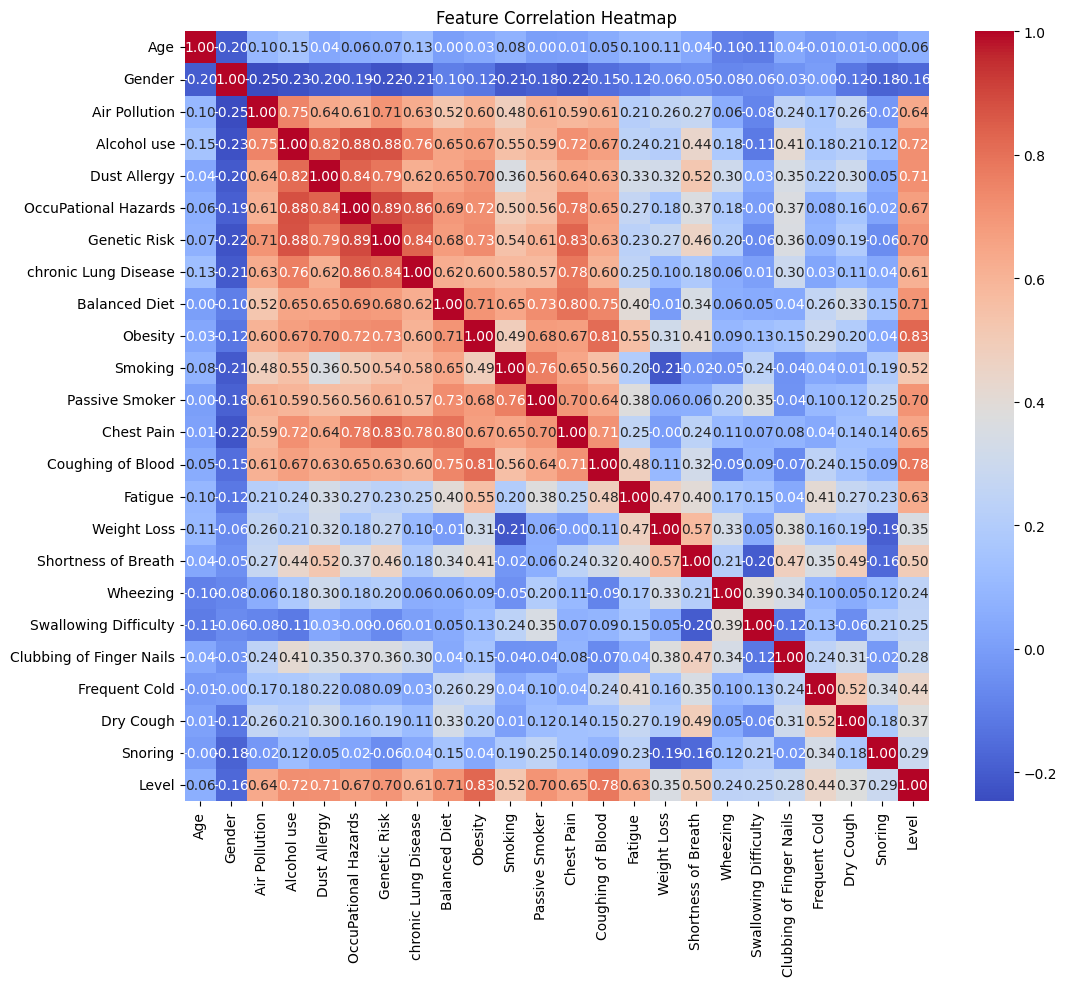

In [90]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

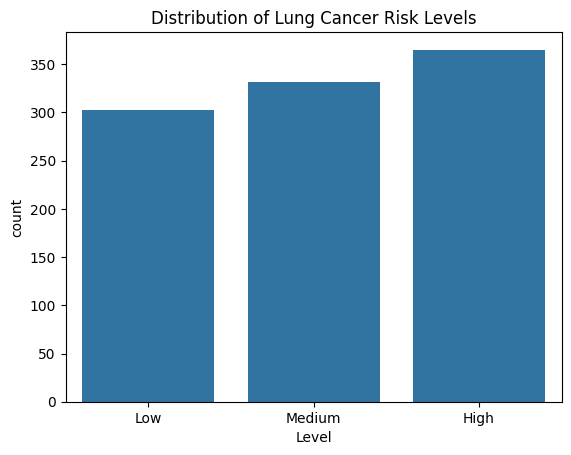

In [91]:
# Distribution of the target variable
sns.countplot(x='Level', data=df)
plt.title('Distribution of Lung Cancer Risk Levels')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.show()

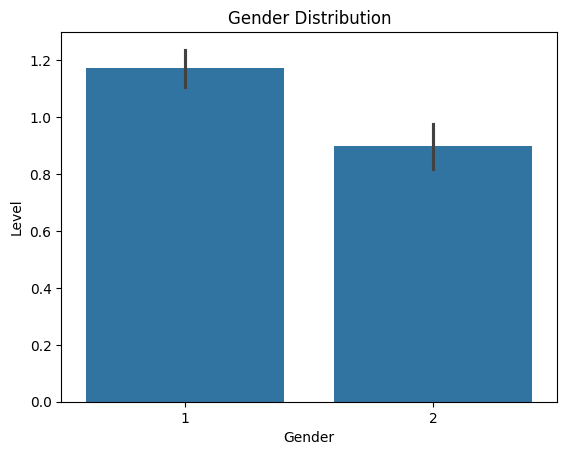

In [92]:
# Distribution of Gender and other features
sns.barplot(data=df, x='Gender', y='Level')
plt.title('Gender Distribution')
plt.show()

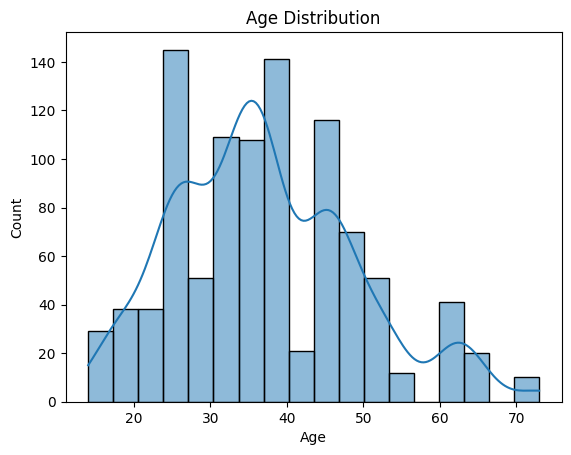

In [93]:
# Distribution of AGE and other features
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

## Model Training and Comparison

In [94]:
# Defining the dependent and independant variables to train the model
X = df.drop('Level', axis=1)
y = df['Level']

In [95]:
# Split the dataset into training and testing
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)


Training and evaluating Logistic Regression
Cross-validation accuracy: 1.0000 (+/- 0.0000)

Evaluation Metrics for Logistic Regression:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        76
      Medium       1.00      1.00      1.00        83
        High       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



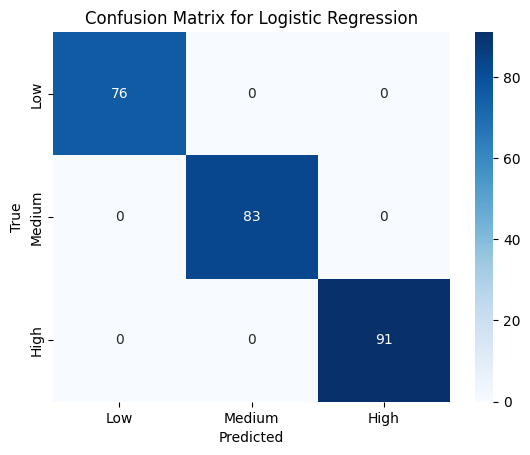


Training and evaluating Random Forest
Cross-validation accuracy: 1.0000 (+/- 0.0000)

Evaluation Metrics for Random Forest:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        76
      Medium       1.00      1.00      1.00        83
        High       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



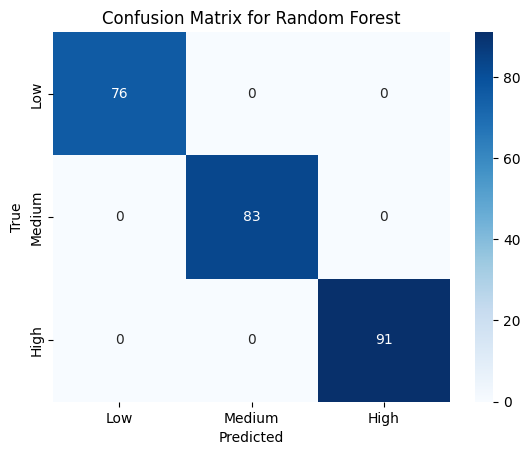

In [96]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

results = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'\nTraining and evaluating {name}')
    # Cross-validation
    cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    results[name] = cv_results.mean()
    print(f'Cross-validation accuracy: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})')

    # Train and predict on the test set
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)

    # Model evaluation
    print(f'\nEvaluation Metrics for {name}:')
    print(f'Accuracy: {accuracy_score(test_y, y_pred):.4f}')
    print(f'\nClassification Report:\n{classification_report(test_y, y_pred, target_names=['Low', 'Medium', 'High'])}')
    cm = confusion_matrix(test_y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Save the best performing model

In [97]:
# Find the best performing model based on cross-validation results
best_model_name = max(results, key=results.get)
print(f'The best model is: {best_model_name} with a cross-validation accuracy of {results[best_model_name]:.4f}')

# Retrain the best model on the full training data and save it
best_model = models[best_model_name]
best_model.fit(X, y)
joblib.dump(best_model, '../models/best_model_lung_cancer.pkl')

print('Best model saved successfully.')

The best model is: Logistic Regression with a cross-validation accuracy of 1.0000
Best model saved successfully.
